In [ ]:
#Using Binance API to 

1. Setup the Binance API

2. Pull Data from Binance using Python

3. Perform EDA with Binance Data

4. Visualize Candlesticks

# 1. Setup

You will need a Binance Account in order to get an API key.

Go to your Binance and Click on Profile button then scroll down to "API MANAGEMENT".

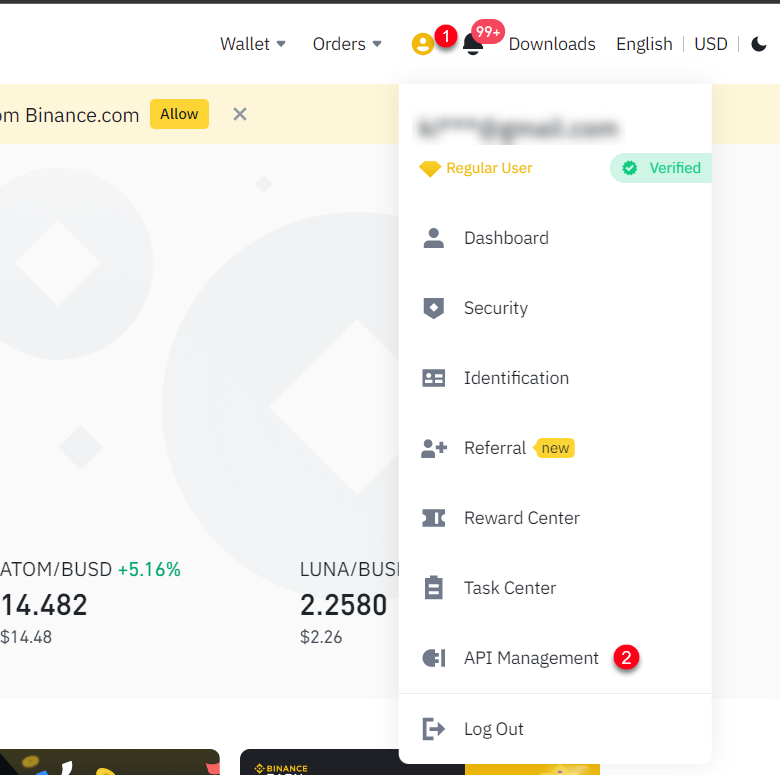

Read through the instruction provided by Binance

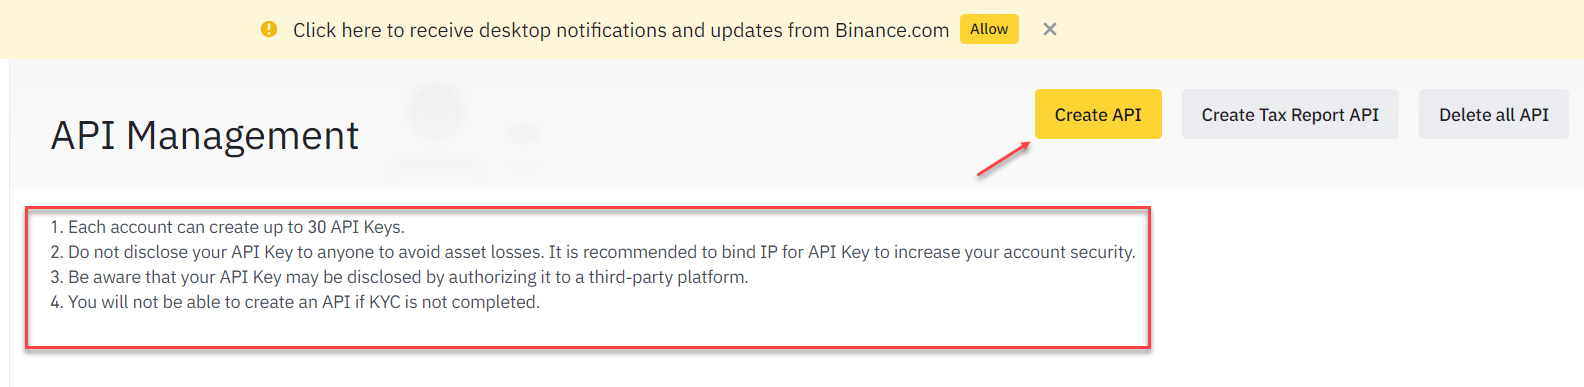

Provide a Label name for your API

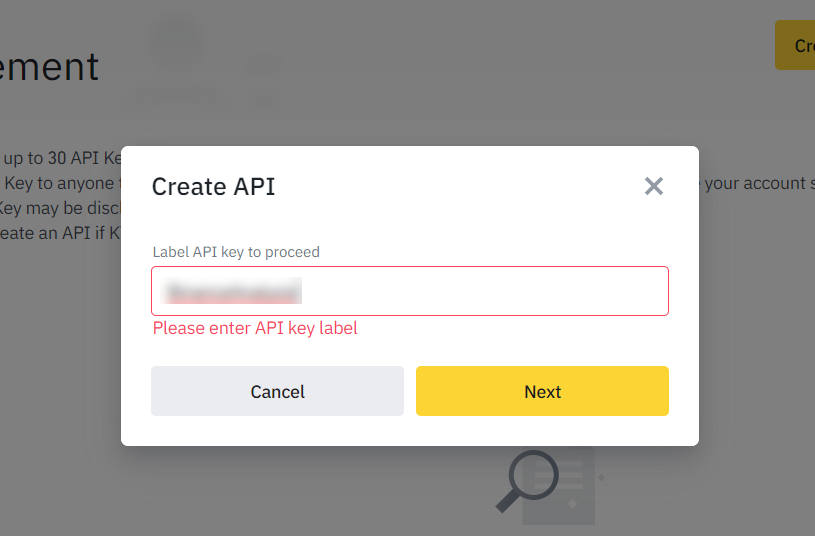

Verify your account by filling in the following information

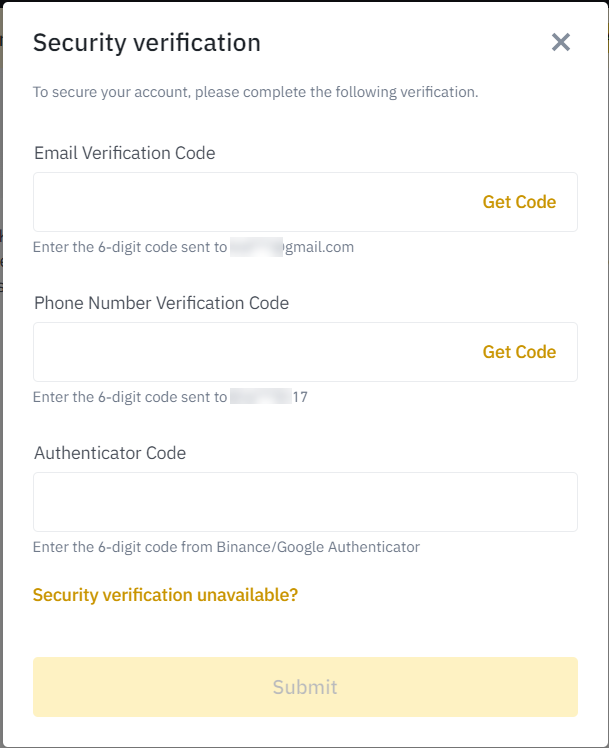

Add restriction to IP address by enabling only your system IP to be able to connect to your Binance API.

- Go to Google.com and search for "My IP Address"

- Copy the address and paste in your address restriction.

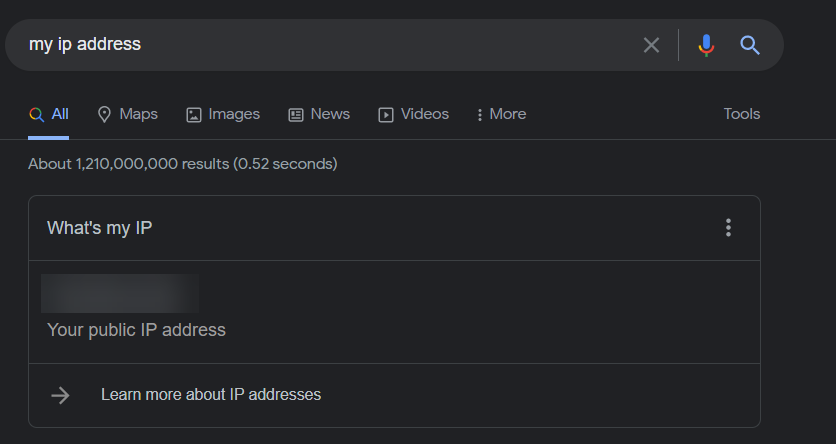

Add your IP Address and confirm it.

Copy and save your API Key & Secret KEY in a secure place only you have access to. 

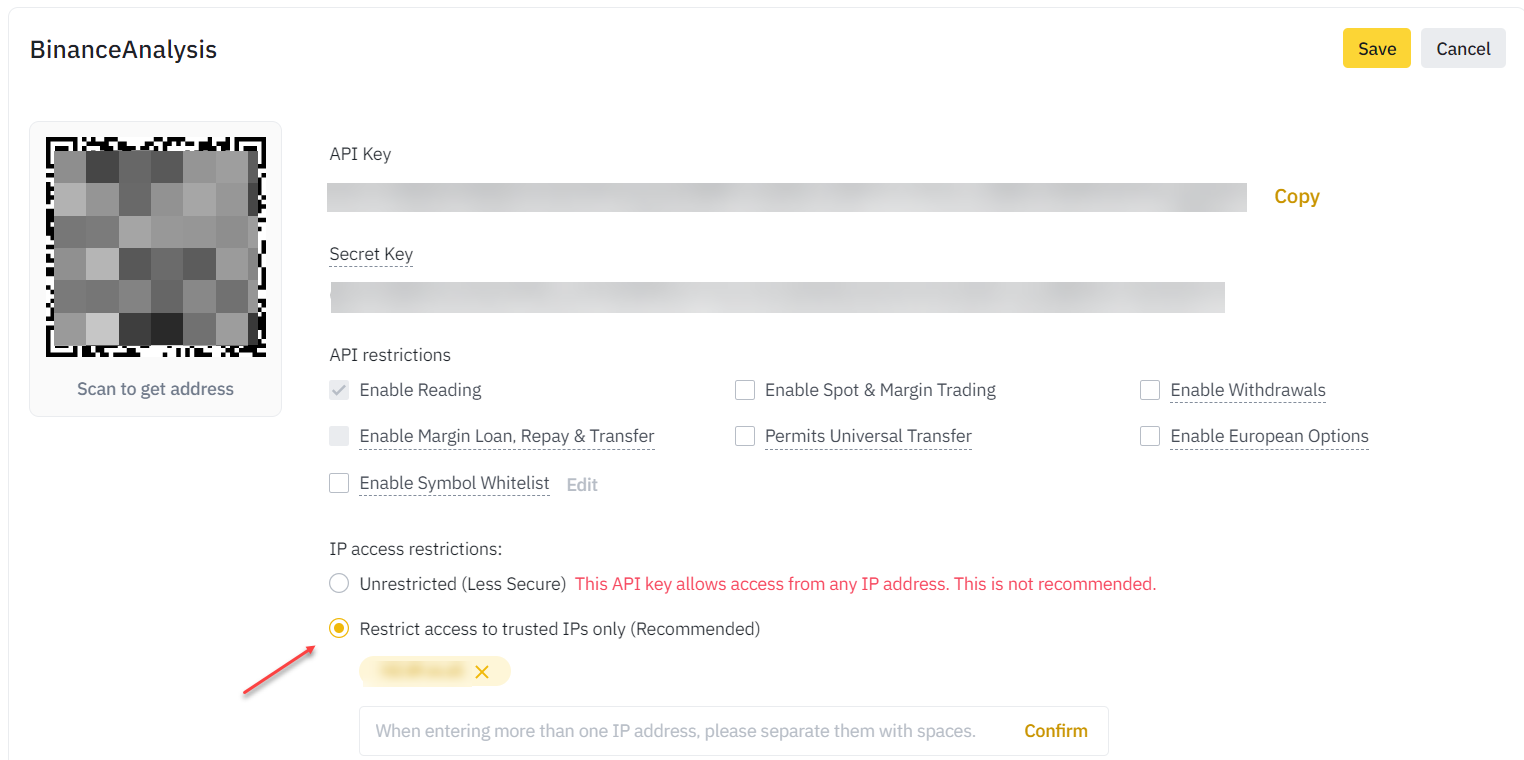

Now you can save.

In [2]:
import configparser #ConfigParser is a Python class which implements a basic configuration language for Python programs.
import re #RegEx : Regular expression
#Import all necessary Libraries
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import matplotlib.pyplot as plt
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import pandas_datareader as web
import datetime as dt

# 2. Configuration & Authentification:

Set up the client keys and Authenticate to Binance.
A Python class called ConfigParser implements a simple configuration language for Python apps. It offers a framework resembling INI files for Microsoft Windows. ConfigParser enables the creation of Python applications that end users can simply modify.

This is done solely with the purpose of security. 
- Create a new text file on your system.
- Write out the following line of code that can be found in the image below.
- Copy and paste the following keys:
i. api_key = xxxxxxxxxx
ii. api_secret = xxxxxxxxxx

This is done to prevent one from having accesss to your secret keys given to you when you created your developer account.

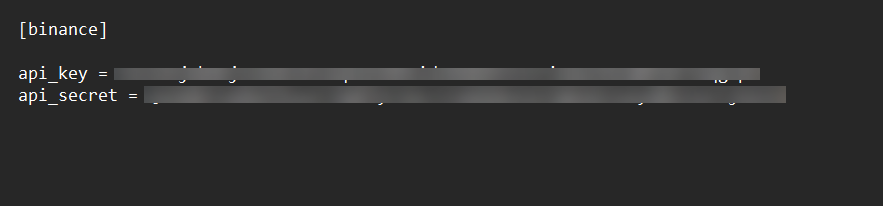


In [3]:
#read configs
config = configparser.ConfigParser()
config.read("config.ini") #The Config.ini file we just created

api_key = config["binance"]["api_key"]
api_secret = config["binance"]["api_secret"]

## Creating variable for both the API Key and Secret Key

In [4]:
client = Client(api_key, api_secret)

For this we need to install the following libraries:
- [Python-Binance](https://pypi.org/project/python-binance/) : Binance REST API python implementation for easy connection to Binance API

- [mplfinance](https://pypi.org/project/mplfinance/) : enable you to visualize finance data easily.

In [ ]:
!pip install python-binance mplfinance 

# 3. Get Tickers

Get the Ticker name of your favorite crypto currency

In [5]:
tickers = client.get_all_tickers()
tickers #This is used to get the entire tickets available on Binance

[{'symbol': 'ETHBTC', 'price': '0.06740500'},
 {'symbol': 'LTCBTC', 'price': '0.00275400'},
 {'symbol': 'BNBBTC', 'price': '0.01462100'},
 {'symbol': 'NEOBTC', 'price': '0.00044800'},
 {'symbol': 'QTUMETH', 'price': '0.00216600'},
 {'symbol': 'EOSETH', 'price': '0.00090000'},
 {'symbol': 'SNTETH', 'price': '0.00002119'},
 {'symbol': 'BNTETH', 'price': '0.00032700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011580'},
 {'symbol': 'BNBETH', 'price': '0.21680000'},
 {'symbol': 'BTCUSDT', 'price': '19565.55000000'},
 {'symbol': 'ETHUSDT', 'price': '1318.83000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001596'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
#Wrap the data into a pandas dataFrame
Binance_df = pd.DataFrame(tickers)
Binance_df.head()

,symbol,price
0,ETHBTC,0.06740500
1,LTCBTC,0.00275400
2,BNBBTC,0.01462100
3,NEOBTC,0.00044800
4,QTUMETH,0.00216600


In [7]:
#Let make the Symbol the Index value
Binance_df.set_index("symbol", inplace=True)

In [8]:
Binance_df.head()

,price
symbol,
ETHBTC,0.06740500
LTCBTC,0.00275400
BNBBTC,0.01462100
NEOBTC,0.00044800
QTUMETH,0.00216600


In [9]:
float(Binance_df.loc["ETHBTC"]["price"])

#Loc: Used to locate a specific ticker name
#Float: Helps convert string to integer

0.067405

# 4. Get Depth

The "get_order_book" function allows you to retrieve market depth data from Binance.
To Limit the amount of output you can include the Ticker you're looking for.

In [10]:
depth = client.get_order_book(symbol="ETHBTC")
depth

{'lastUpdateId': 6014629850,
 'bids': [['0.06740500', '1.60000000'],
  ['0.06740100', '3.52740000'],
  ['0.06740000', '8.43500000'],
  ['0.06739900', '0.09620000'],
  ['0.06739800', '0.00610000'],
  ['0.06739700', '3.52900000'],
  ['0.06739600', '0.10240000'],
  ['0.06739500', '0.00610000'],
  ['0.06739400', '0.02350000'],
  ['0.06739200', '0.10600000'],
  ['0.06739100', '0.02350000'],
  ['0.06739000', '2.00000000'],
  ['0.06738900', '0.00860000'],
  ['0.06738800', '0.92340000'],
  ['0.06738600', '0.00610000'],
  ['0.06738500', '0.02350000'],
  ['0.06738400', '0.69580000'],
  ['0.06738300', '0.00610000'],
  ['0.06738200', '0.05540000'],
  ['0.06738100', '1.78810000'],
  ['0.06738000', '4.79910000'],
  ['0.06737900', '0.82350000'],
  ['0.06737800', '0.15010000'],
  ['0.06737700', '0.00610000'],
  ['0.06737600', '0.62270000'],
  ['0.06737500', '1.24700000'],
  ['0.06737400', '0.00610000'],
  ['0.06737300', '0.11830000'],
  ['0.06737200', '0.09990000'],
  ['0.06737100', '0.00610000'],
  [

To better visualize the information we can put it in a DataFrame

In [11]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ["Price","Volume"]
depth_df.head()

,Price,Volume
0,0.06740500,1.60000000
1,0.06740100,3.52740000
2,0.06740000,8.43500000
3,0.06739900,0.09620000
4,0.06739800,0.00610000


**Historical Data Information**

[
- Open time
- Open
- High
- Low
- Close
- Volume
- Close time
- Quote asset volume
- Number of trades
- Taker buy base asset volume
- Taker buy quote asset volume
- Ignore

]

In [12]:
Historical_df = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_1DAY, "1 Jan 2018")

In [13]:
Historical_df

[[1514764800000,
  '0.05358600',
  '0.05720000',
  '0.05340100',
  '0.05636700',
  '312440.75700000',
  1514851199999,
  '17404.15888156',
  406017,
  '150566.08800000',
  '8389.50328492',
  '0'],
 [1514851200000,
  '0.05636800',
  '0.06626500',
  '0.05104000',
  '0.05826100',
  '492006.75900000',
  1514937599999,
  '30046.04448991',
  656785,
  '234144.31200000',
  '14291.85749229',
  '0'],
 [1514937600000,
  '0.05830000',
  '0.06421000',
  '0.05644900',
  '0.06260000',
  '469486.61700000',
  1515023999999,
  '27812.69661769',
  654095,
  '217935.11100000',
  '12922.27985030',
  '0'],
 [1515024000000,
  '0.06260000',
  '0.07000000',
  '0.06012500',
  '0.06223600',
  '595991.61300000',
  1515110399999,
  '38477.31889398',
  872477,
  '283608.90400000',
  '18313.39141126',
  '0'],
 [1515110400000,
  '0.06244900',
  '0.06975800',
  '0.05400000',
  '0.05658400',
  '710527.22100000',
  1515196799999,
  '44244.99071450',
  945045,
  '345391.45200000',
  '21479.25507307',
  '0'],
 [151519680

**get_historical_klines:** The historical klines function allows you to retrieve Spot and Future OHLCV data from Binance

You can specify a number of parameters including: Symbols, Start/End, interval, the limit and types .

In [14]:
Hist_df = pd.DataFrame(Historical_df)

In [15]:
Hist_df.columns = ["Open time","Open","High","Low","Close","Volume","Close time","Quote asset volume","Number of trades",
                   "Taker buy base asset volume","Taker buy quote asset volume","Ignore"]

In [16]:
Hist_df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1514764800000,0.05358600,0.05720000,0.05340100,0.05636700,312440.75700000,1514851199999,17404.15888156,406017,150566.08800000,8389.50328492,0
1,1514851200000,0.05636800,0.06626500,0.05104000,0.05826100,492006.75900000,1514937599999,30046.04448991,656785,234144.31200000,14291.85749229,0
2,1514937600000,0.05830000,0.06421000,0.05644900,0.06260000,469486.61700000,1515023999999,27812.69661769,654095,217935.11100000,12922.27985030,0
3,1515024000000,0.06260000,0.07000000,0.06012500,0.06223600,595991.61300000,1515110399999,38477.31889398,872477,283608.90400000,18313.39141126,0
4,1515110400000,0.06244900,0.06975800,0.05400000,0.05658400,710527.22100000,1515196799999,44244.99071450,945045,345391.45200000,21479.25507307,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1664409600000,0.06888400,0.06918700,0.06807700,0.06818800,113202.45250000,1664495999999,7769.14911935,325040,54672.19820000,3752.65528952,0
1733,1664496000000,0.06818900,0.06908800,0.06759800,0.06841200,143320.64130000,1664582399999,9807.29687030,345607,71619.87520000,4901.01245166,0
1734,1664582400000,0.06841300,0.06900200,0.06782000,0.06792900,55994.75360000,1664668799999,3834.80388995,164676,28314.05560000,1939.61496097,0
1735,1664668800000,0.06792900,0.06814400,0.06692500,0.06699600,59803.32150000,1664755199999,4045.55820115,175854,29744.04950000,2012.27626474,0


In [17]:
Hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Open time                     1737 non-null   int64 
 1   Open                          1737 non-null   object
 2   High                          1737 non-null   object
 3   Low                           1737 non-null   object
 4   Close                         1737 non-null   object
 5   Volume                        1737 non-null   object
 6   Close time                    1737 non-null   int64 
 7   Quote asset volume            1737 non-null   object
 8   Number of trades              1737 non-null   int64 
 9   Taker buy base asset volume   1737 non-null   object
 10  Taker buy quote asset volume  1737 non-null   object
 11  Ignore                        1737 non-null   object
dtypes: int64(3), object(9)
memory usage: 163.0+ KB


In [18]:
Hist_df.shape

(1737, 12)

# 6. Data Transformation & Preprocessing

We need to standardized the data to the various datatypes

In [19]:
#We need to convert the Time from Object to datetime format
Hist_df["Open time"] = pd.to_datetime(Hist_df["Open time"]/1000, unit="s")
Hist_df["Close time"] = pd.to_datetime(Hist_df["Close time"]/1000, unit="s")

In [20]:
#Covert others to float datatype
numeric_columns = ["Open","High","Low","Close","Volume","Quote asset volume",
                   "Taker buy base asset volume","Taker buy quote asset volume","Ignore"]

In [21]:
Hist_df[numeric_columns] = Hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [22]:
Hist_df.dtypes

Open time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Ignore                                 float64
dtype: object

In [23]:
Hist_df.describe() # This used to get the statistical analysis

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,1737.000000,1737.000000,1737.000000,1737.000000,1.737000e+03,1737.000000,1.737000e+03,1737.000000,1737.000000,1737.0
mean,0.046915,0.047891,0.045893,0.046922,2.016016e+05,8346.990692,2.113410e+05,101172.292976,4182.705900,0.0
std,0.022600,0.023083,0.022092,0.022604,1.381214e+05,5786.479211,1.273532e+05,68920.504320,2838.860983,0.0
min,0.016415,0.016560,0.016150,0.016415,3.008810e+03,300.188484,1.256100e+04,1478.180000,147.688668,0.0
25%,0.027661,0.028429,0.027003,0.027660,1.096395e+05,4833.059638,1.268760e+05,55022.074800,2428.250529,0.0
50%,0.035382,0.036127,0.034600,0.035388,1.620348e+05,7023.230833,1.738870e+05,81648.842000,3572.309698,0.0
75%,0.069030,0.070522,0.067820,0.069004,2.489616e+05,9911.744317,2.533350e+05,127088.027000,5001.091902,0.0
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271,0.0


# 7. Data Visualization

For this we will be using the **mpflfinance** library

In [24]:
import mplfinance as mpf 
import matplotlib.pyplot as plt

In [25]:
Hist_df.set_index("Close time").tail(100)

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Close time,,,,,,,,,,,
2022-06-26 23:59:59.999000064,2022-06-26,0.057797,0.059159,0.056905,0.056940,184170.4854,10643.815949,199661,85355.0139,4934.770902,0.0
2022-06-27 23:59:59.999000064,2022-06-27,0.056937,0.058137,0.056910,0.057496,176915.0051,10157.286384,199510,89137.1022,5117.890161,0.0
2022-06-28 23:59:59.999000064,2022-06-28,0.057482,0.058572,0.056229,0.056411,211452.4246,12147.061904,222418,102881.8553,5910.639329,0.0
2022-06-29 23:59:59.999000064,2022-06-29,0.056410,0.056758,0.054400,0.054671,327986.1946,18198.464390,307343,148207.3840,8225.792708,0.0
2022-06-30 23:59:59.999000064,2022-06-30,0.054671,0.054896,0.053069,0.053715,298199.2321,16111.682663,290135,149492.4098,8078.023624,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29 23:59:59.999000064,2022-09-29,0.068884,0.069187,0.068077,0.068188,113202.4525,7769.149119,325040,54672.1982,3752.655290,0.0
2022-09-30 23:59:59.999000064,2022-09-30,0.068189,0.069088,0.067598,0.068412,143320.6413,9807.296870,345607,71619.8752,4901.012452,0.0
2022-10-01 23:59:59.999000064,2022-10-01,0.068413,0.069002,0.067820,0.067929,55994.7536,3834.803890,164676,28314.0556,1939.614961,0.0


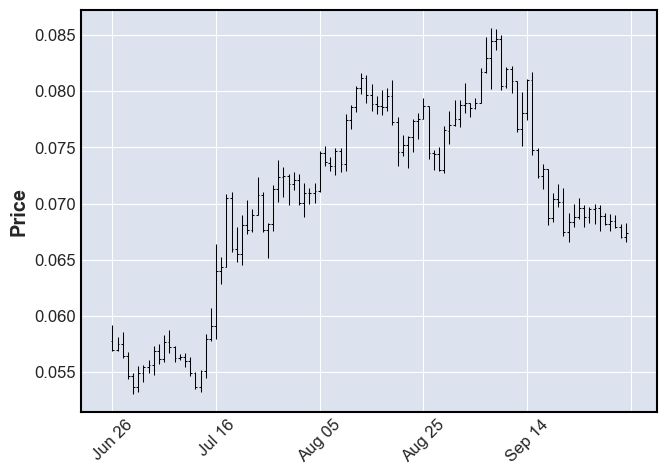

In [26]:
mpf.plot(Hist_df.set_index("Close time").tail(100))

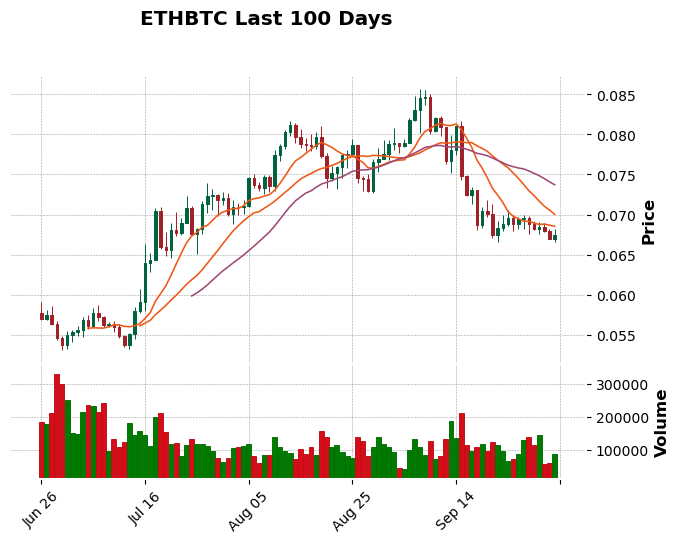

In [27]:
mpf.plot(Hist_df.set_index("Close time").tail(100),type="candle", style="charles", volume=True,title="ETHBTC Last 100 Days",
    mav=(10,20,30))

# Section B: Let Create a Forcast Model

In [28]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Prepare Data using MinMax
The Scaler MinMax helps in standardising the Data between a range from (0,1)

In [29]:
Hist_df = Hist_df.set_index("Close time")
Hist_df.head()

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Close time,,,,,,,,,,,
2018-01-01 23:59:59.999000064,2018-01-01,0.053586,0.057200,0.053401,0.056367,312440.757,17404.158882,406017,150566.088,8389.503285,0.0
2018-01-02 23:59:59.999000064,2018-01-02,0.056368,0.066265,0.051040,0.058261,492006.759,30046.044490,656785,234144.312,14291.857492,0.0
2018-01-03 23:59:59.999000064,2018-01-03,0.058300,0.064210,0.056449,0.062600,469486.617,27812.696618,654095,217935.111,12922.279850,0.0
2018-01-04 23:59:59.999000064,2018-01-04,0.062600,0.070000,0.060125,0.062236,595991.613,38477.318894,872477,283608.904,18313.391411,0.0
2018-01-05 23:59:59.999000064,2018-01-05,0.062449,0.069758,0.054000,0.056584,710527.221,44244.990715,945045,345391.452,21479.255073,0.0


In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Hist_df['Close'].values.reshape(-1,1))

In [31]:
#Prediction Day
prediction_days = 60 # Number of days the neural network will predict

In [32]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the Neural Network

In [33]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # To prevent overfitting
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2)) # To prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
53/53 [==============================] - 8s 51ms/step - loss: 0.0156
Epoch 2/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0035
Epoch 3/50
53/53 [==============================] - 3s 49ms/step - loss: 0.0029
Epoch 4/50
53/53 [==============================] - 3s 51ms/step - loss: 0.0029
Epoch 5/50
53/53 [==============================] - 3s 51ms/step - loss: 0.0027
Epoch 6/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0023
Epoch 7/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0026
Epoch 8/50
53/53 [==============================] - 3s 51ms/step - loss: 0.0023
Epoch 9/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0022
Epoch 10/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0022
Epoch 11/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0020
Epoch 12/50
53/53 [==============================] - 3s 50ms/step - loss: 0.0020
Epoch 13/50
53/53 [==================

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [35]:
print(len(model.layers))

7


# Test the Model

In [47]:
test_start = dt.datetime(2022,1,1)
test_end = dt.datetime.now()


test_data_df = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_1DAY, "1 Jan 2022")
#Historical_df = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_1DAY, "1 Jan 2018")

In [49]:
test_data_df

[[1640995200000,
  '0.07954400',
  '0.07988600',
  '0.07852000',
  '0.07891100',
  '35297.49890000',
  1641081599999,
  '2794.65447122',
  88391,
  '17319.44160000',
  '1371.79709809',
  '0'],
 [1641081600000,
  '0.07891100',
  '0.08122200',
  '0.07890400',
  '0.08096200',
  '45197.01650000',
  1641167999999,
  '3622.03758271',
  108799,
  '21769.91020000',
  '1743.79950224',
  '0'],
 [1641168000000,
  '0.08096300',
  '0.08147700',
  '0.08035800',
  '0.08106900',
  '53563.56070000',
  1641254399999,
  '4334.83497122',
  121342,
  '24097.72720000',
  '1950.15791108',
  '0'],
 [1641254400000,
  '0.08107000',
  '0.08292000',
  '0.08074000',
  '0.08258500',
  '60023.61140000',
  1641340799999,
  '4915.60480706',
  138840,
  '28969.35210000',
  '2372.17928172',
  '0'],
 [1641340800000,
  '0.08258900',
  '0.08259100',
  '0.08023400',
  '0.08148600',
  '63735.77870000',
  1641427199999,
  '5211.66244471',
  177136,
  '30130.52840000',
  '2464.08432546',
  '0'],
 [1641427200000,
  '0.08145900'

In [50]:
test_df = pd.DataFrame(test_data_df)

In [51]:
test_df.columns = ["Open time","Open","High","Low","Close","Volume","Close time","Quote asset volume","Number of trades",
                   "Taker buy base asset volume","Taker buy quote asset volume","Ignore"]

In [53]:
test_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1640995200000,0.07954400,0.07988600,0.07852000,0.07891100,35297.49890000,1641081599999,2794.65447122,88391,17319.44160000,1371.79709809,0
1,1641081600000,0.07891100,0.08122200,0.07890400,0.08096200,45197.01650000,1641167999999,3622.03758271,108799,21769.91020000,1743.79950224,0
2,1641168000000,0.08096300,0.08147700,0.08035800,0.08106900,53563.56070000,1641254399999,4334.83497122,121342,24097.72720000,1950.15791108,0
3,1641254400000,0.08107000,0.08292000,0.08074000,0.08258500,60023.61140000,1641340799999,4915.60480706,138840,28969.35210000,2372.17928172,0
4,1641340800000,0.08258900,0.08259100,0.08023400,0.08148600,63735.77870000,1641427199999,5211.66244471,177136,30130.52840000,2464.08432546,0


In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Open time                     274 non-null    int64 
 1   Open                          274 non-null    object
 2   High                          274 non-null    object
 3   Low                           274 non-null    object
 4   Close                         274 non-null    object
 5   Volume                        274 non-null    object
 6   Close time                    274 non-null    int64 
 7   Quote asset volume            274 non-null    object
 8   Number of trades              274 non-null    int64 
 9   Taker buy base asset volume   274 non-null    object
 10  Taker buy quote asset volume  274 non-null    object
 11  Ignore                        274 non-null    object
dtypes: int64(3), object(9)
memory usage: 25.8+ KB


In [55]:
#Data Transformation & Preprocessing
test_df["Open time"] = pd.to_datetime(test_df["Open time"]/1000, unit="s")
test_df["Close time"] = pd.to_datetime(test_df["Close time"]/1000, unit="s")

In [56]:
#Covert others to float datatype
numeric_columns = ["Open","High","Low","Close","Volume","Quote asset volume",
                   "Taker buy base asset volume","Taker buy quote asset volume","Ignore"]

In [57]:
test_df[numeric_columns] = test_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     274 non-null    datetime64[ns]
 1   Open                          274 non-null    float64       
 2   High                          274 non-null    float64       
 3   Low                           274 non-null    float64       
 4   Close                         274 non-null    float64       
 5   Volume                        274 non-null    float64       
 6   Close time                    274 non-null    datetime64[ns]
 7   Quote asset volume            274 non-null    float64       
 8   Number of trades              274 non-null    int64         
 9   Taker buy base asset volume   274 non-null    float64       
 10  Taker buy quote asset volume  274 non-null    float64       
 11  Ignore                        27

In [60]:
actual_prices = test_df['Close'].values

In [61]:
total_dataset = pd.concat((Hist_df['Close'], test_df['Close']), axis=0)

In [62]:
model_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

9/9 [==============================] - 1s 21ms/step


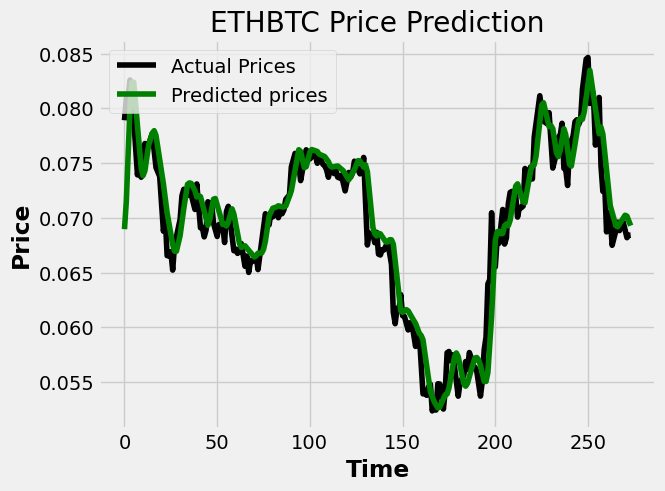

In [65]:
plt.plot(actual_prices, color="black", label="Actual Prices")
plt.plot(prediction_prices, color="green", label="Predicted prices")
plt.title("ETHBTC Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()